<a href="https://colab.research.google.com/github/husnain77/ASL-Hand-Sing-Language-Detection/blob/main/AirQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Articial Intelligence and Machine Learning - Coursework 1 - 1st diet
## Air quality dataset
# Student Name: Ahmed-MalikIbrar-S2267644

I confirm that the material contained within the submitted coursework is all my own work unless otherwise stated below.

---

In [ ]:
# @title Loading Dependecies
import pandas as pd # used for data loading/manipulation
import numpy as np # used for algebric data manipulation
import matplotlib.pyplot as plt # used for data visualisation
import seaborn as sns # used for data visualization
from datetime import datetime # used to extract hour and week features from date
from sklearn.ensemble import RandomForestRegressor # Tree Based ML Model
from sklearn.linear_model import LinearRegression #  Simple line of best fit model
from sklearn.metrics import mean_squared_error, r2_score # used for evaluation


## 1. Introduction and problem definition
Air quality is a critical aspect of environmental monitoring, directly impacting human health and environmental integrity. With rapid urbanization and industrialization, monitoring and predicting air quality has become increasingly important for public health, policy-making, and environmental protection.

**Objective:**
This project focuses on leveraging machine learning SVM model to analyze air quality data and predict key indicators of air pollution. Specifically, we undertake two main tasks:

**Predicting Carbon Monoxide (CO) Concentration:**

Utilizing sensor data and environmental factors to predict the concentration of CO, a primary pollutant that poses significant health risks.

**Defining and Predicting a Custom Air Quality Index (AQI):**

Creating a composite index based on multiple pollutants to represent overall air quality and using machine learning models to predict this index from various sensor readings and environmental variables.

**Data:**

The analysis is based on a dataset comprising hourly-averaged responses from an array of metal-oxide chemical sensors embedded in an air quality chemical multi-sensor device. The dataset includes sensor readings for various pollutants, alongside ground-truth data for CO and other gases, recorded over a year in an urban environment with significant pollution levels.


## 2. Data ingeston
We have saved the data fro

In [ ]:
#  mounting our google drive with the notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = "/content/drive/Othercomputers/Lenovo/Machine_Learning/Miscellenous/AirQuality/AirQuality.csv"
df = pd.read_csv(filepath) # reading the file path
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568,NaN,NaN
9353,04/04/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119,NaN,NaN
9354,04/04/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406,NaN,NaN
9355,04/04/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T(C)           9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(7), int64(8), object(2)
memory usage: 1.2

## 3. Data preparation (common to both tasks)
We have suspected from viewing the data as seen above that we have unnamed columns as both of them are empty so we have dropped irrelevant columns and further we have checked for missing values where we have observed that our data doesnot contain any missing values.

Further more NMHC(GT) has been removed due to its large number of missing values.

Further we have converted the 'Date' and 'Time' columns into datetime objects and extract useful features (like the day of the week and the hour).

Moreover all -200 values have been replaced with np.nan, which will allow for correct operation of typical data analysis functions.

Lastly we have defined a new column indicating whether the time of measurement falls within peak road usage hours.Similarly, defined a column to indicate valley road usage hours.

In [ ]:
# Dropping irrelevant columns
df.drop(columns=["Unnamed: 15", "Unnamed: 16"], inplace=True)


In [ ]:
# Replacing -200 values with np.nan
df.replace(-200, np.nan, inplace=True)
df.isna().sum()

Date                0
Time                0
CO(GT)           1672
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T(C)              366
RH                366
AH                366
dtype: int64

In [ ]:
# Dropping the NMHC(GT) column due to large number of null values
df = df.drop(columns=['NMHC(GT)'])

In [ ]:
from datetime import datetime

# Parsing Date and Time columns
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Extracting Day of the Hour
df['Hour'] = df['DateTime'].dt.hour

In [ ]:
# Extracting the DayOfWeek column to use day names
df['DayOfWeek'] = pd.to_datetime(df['Date'], dayfirst=True).dt.day_name()

In [ ]:
# Function to determine if it's peak time
def is_peak_time(hour, day):
    # Peak times on working days (Monday to Friday)
    if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        return 8 <= hour < 12 or 18 <= hour < 22
    # Peak times on non-working days (Saturday and Sunday)
    else:
        return 9 <= hour < 12

# Function to determine if it's valley time
def is_valley_time(hour):
    return 2 <= hour < 6

# Creating the 'PeakTime' and 'ValleyTime' attributes
df['PeakTime'] = df.apply(lambda row: is_peak_time(row['Hour'], row['DayOfWeek']), axis=1)
df['ValleyTime'] = df['Hour'].apply(is_valley_time)

# Checking the updated DataFrame
df

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),RH,AH,DateTime,Hour,DayOfWeek,PeakTime,ValleyTime
0,10/03/2004,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-10-03 18:00:00,18,Wednesday,True,False
1,10/03/2004,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-10-03 19:00:00,19,Wednesday,True,False
2,10/03/2004,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-10-03 20:00:00,20,Wednesday,True,False
3,10/03/2004,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-10-03 21:00:00,21,Wednesday,True,False
4,10/03/2004,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-10-03 22:00:00,22,Wednesday,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10:00:00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,2005-04-04 10:00:00,10,Monday,True,False
9353,04/04/2005,11:00:00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,2005-04-04 11:00:00,11,Monday,True,False
9354,04/04/2005,12:00:00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,2005-04-04 12:00:00,12,Monday,False,False
9355,04/04/2005,13:00:00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,2005-04-04 13:00:00,13,Monday,False,False


In [ ]:
# Parsing Date and Time columns
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Extracting Day of the Week and Hour
df['DayOfWeek'] = df['DateTime'].dt.dayofweek  # Monday=0, Sunday=6
df['Hour'] = df['DateTime'].dt.hour

# Checking for any missing or anomalous values in the key columns
key_columns = ['CO(GT)', 'PT08.S1(CO)', 'T(C)', 'RH', 'DayOfWeek', 'Hour']
missing_or_anomalous = df[key_columns].isnull().sum()

missing_or_anomalous

CO(GT)         1672
PT08.S1(CO)     366
T(C)            366
RH              366
DayOfWeek         0
Hour              0
dtype: int64

# TASK 1: CO concentration prediction
Predict the CO concentration (in mg/m3) based on, at least, the PT08.S1(CO) raw sensor readings, day of the week and time.

Maybe temperature and humidity can play a role as well?

Use CO(GT) as the ground truth.

## 4. Further Data preparation (specific for this task)
## Data segregation
We have removed columns that are not required for predicting CO concentration. The focus will be on the raw sensor readings (PT08.S1(CO)), time-related features (DayOfWeek, Hour, PeakTime, ValleyTime), and environmental conditions (T(C), RH).
We will be also imputing missing values in 'PT08.S1(CO)', 'T(C)', and 'RH' with their respective medians as as the median is less sensitive to outliers than the mean.

In [ ]:
# Dropping unnecessary columns for this task
columns_to_keep = ['CO(GT)', 'PT08.S1(CO)', 'T(C)', 'RH', 'DayOfWeek', 'Hour', 'PeakTime', 'ValleyTime']
df_reduced = df[columns_to_keep]

# Checking for missing values in the reduced dataset
missing_values_reduced = df_reduced.isnull().sum()
missing_values_reduced

CO(GT)         1672
PT08.S1(CO)     366
T(C)            366
RH              366
DayOfWeek         0
Hour              0
PeakTime          0
ValleyTime        0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Dropping rows where the target variable 'CO(GT)' is missing
df_reduced = df_reduced.dropna(subset=['CO(GT)'])

# Imputing missing values in 'PT08.S1(CO)', 'T(C)', and 'RH' with their respective medians
for column in ['PT08.S1(CO)', 'T(C)', 'RH']:
    df_reduced[column].fillna(df_reduced[column].median(), inplace=True)

# Encoding 'DayOfWeek' using one-hot encoding
encoder = OneHotEncoder(sparse=False)
day_of_week_encoded = encoder.fit_transform(df_reduced[['DayOfWeek']])
day_of_week_encoded_df = pd.DataFrame(day_of_week_encoded, columns=encoder.get_feature_names_out(['DayOfWeek']))

# Resetting index before concatenation to align the indices
df_reduced.reset_index(drop=True, inplace=True)
df_reduced_encoded = pd.concat([df_reduced, day_of_week_encoded_df], axis=1)

# Dropping the original 'DayOfWeek' column
df_reduced_encoded = df_reduced_encoded.drop('DayOfWeek', axis=1)

# Checking the updated DataFrame
df_reduced_encoded.head()

<ipython-input-40-528383e679cd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[column].fillna(df_reduced[column].median(), inplace=True)
<ipython-input-40-528383e679cd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[column].fillna(df_reduced[column].median(), inplace=True)
<ipython-input-40-528383e679cd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[column].fillna(df_reduced[column].median(), inp

,CO(GT),PT08.S1(CO),T(C),RH,Hour,PeakTime,ValleyTime,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,2.6,1360.0,13.6,48.9,18,True,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,1292.0,13.3,47.7,19,True,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.2,1402.0,11.9,54.0,20,True,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2.2,1376.0,11.0,60.0,21,True,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.6,1272.0,11.2,59.6,22,False,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split # used for splitting the data

In [ ]:
# Selecting features and target for the split
features = df_reduced_encoded.drop('CO(GT)', axis=1)
target = df_reduced_encoded['CO(GT)']

# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Verifying the shapes of the resulting datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((6148, 13), (1537, 13), (6148,), (1537,))

## 5. Model definition and training
The Random Forest Regressor is a powerful model for regression tasks, capable of capturing complex relationships in the data. We'll train a Random Forest Regressor on the training set.

For evaluation we will use Mean Squared Error and R^2 R-Squared score.  R-squared (R2) and Mean Squared Error (MSE) are commonly used metrics for evaluating regression models because they provide important insights into the model's performance in terms of prediction accuracy and error. MSE is the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.R², also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables., MSE and R2 are suitable for regression tasks because they collectively offer a balanced and comprehensive view of a model's predictive accuracy and fit to the observed data.

In [ ]:
# Training a Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## 6. Model evaluation
Evaluation has been done on the testing set for its performance based on the R2 AND MSE SCORE

In [ ]:
# Making predictions on the test set
predictions_rf = model_rf.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, predictions_rf)
r2_rf = r2_score(y_test, predictions_rf)

(mse_rf, r2_rf)

(0.4254902164046221, 0.8048721914154389)

#7. Optimized Model using automatic hyperparameter tuning

 Utilizing techniques like Grid Search or Randomized Search to systematically explore a range of hyperparameters.Given the complexity of the Random Forest algorithm and the potential number of hyperparameters to tune, automatic hyperparameter tuning is more suitable. It can efficiently explore a wide parameter space and is less dependent on trial-and-error compared to manual tuning. For this task, we have used Randomized Search, which randomly samples from the defined hyperparameter space and is generally faster than Grid Search.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Defining the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initializing RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model_rf, param_distributions=param_grid,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fitting RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Best parameters found
best_params = random_search.best_params_
best_params

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': None}

In [ ]:
tuned_rf = RandomForestRegressor(random_state=42, n_estimators= 500,
 min_samples_split=2,
 min_samples_leaf= 2,
 max_features='log2',
 max_depth =None)

tuned_rf.fit(X_train, y_train)

predictions_rf = tuned_rf.predict(X_test)

# Evaluating the tuned model
mse_rf = mean_squared_error(y_test, predictions_rf)
r2_rf = r2_score(y_test, predictions_rf)

(mse_rf, r2_rf)

(0.39294082526102475, 0.8197991888403857)

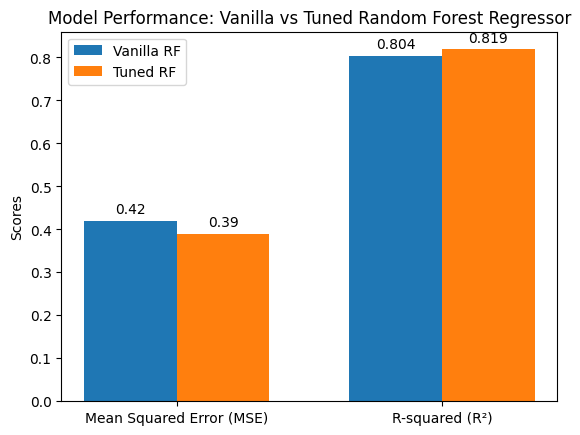

In [ ]:
import matplotlib.pyplot as plt

# Data for visualization
metrics = ['Mean Squared Error (MSE)', 'R-squared (R²)']
vanilla_scores = [0.42, 0.804]
tuned_scores = [0.39, 0.819]

# Creating the bar chart
x = range(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, vanilla_scores, width, label='Vanilla RF')
rects2 = ax.bar([p + width for p in x], tuned_scores, width, label='Tuned RF')

# Adding some text for labels, title
ax.set_ylabel('Scores')
ax.set_title('Model Performance: Vanilla vs Tuned Random Forest Regressor')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(metrics)
ax.legend()

# Function to add value labels on the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Adding labels to the bars
add_labels(rects1)
add_labels(rects2)

plt.show()


The bar chart in the above figure visually compares the performance of the Vanilla and Tuned Random Forest Regressors.Lower values indicate better performance. The Tuned Random Forest shows an improvement over the Vanilla model, reducing the MSE from 0.42 to 0.39. Higher values indicate better performance. The Tuned Random Forest also shows an improvement in R², increasing from 0.804 to 0.819.

 The visualization clearly demonstrates that hyperparameter tuning has enhanced the performance of the Random Forest Regressor, both in terms of reducing the error and increasing the proportion of explained variance.

# TASK 2: Air Quality Index creation and prediction
Define an Air Quality Index (based on adequate literature) by combining the ground-truth readings of several gases.

Then, use ML to predict your Air Quality Index from several raw sensor readings and other columns of interest (obviously without using the ground truth column).

Creating an Air Quality Index (AQI) requires a systematic approach to combine the concentrations of various pollutants into a single number that represents the overall level of air pollution and its health implications. The AQI is typically structured so that a higher value represents poorer air quality and greater potential health risks. We have created an AQI based on available ground-truth measurements. For simplicity, let's assume we have ground-truth readings for Carbon Monoxide (CO), Nitrogen Dioxide (NO2), and any other relevant pollutants in your dataset.



## 4. Further Data preparation (specific for this task)
We have defined a simple AQI that averages the normalized concentrations of CO and NO2 gases.
Normalization could involve scaling each pollutant concentration to a common scale, such as 0 to 100. Where we have used the max values the CO AND NO2 and normalised by taking the percentage and further an average is taken for creating Custom AQI, which is our target variable.
We have removed CO and NO2 from the dataset and used the selected important features to be included in our dataset where we have further created an 80:20 split.
Upon checking the null values in our splits we have imputed the train and test splits X values with median.

We have used Linear Regression which is a simple yet effective model for many regression tasks. It works well when there is a linear relationship between the features and the target variable.

In [ ]:
df['CO(GT)'].max()

11.9

In [ ]:
df['NO2(GT)'].max()

340.0

In [ ]:
max_co = df['CO(GT)'].max() # max level for CO in mg/m3
max_no2 = df['NO2(GT)'].max()  # max level for NO2 in µg/m3

# Calculate normalized values for CO and NO2
df['Normalized_CO'] = df['CO(GT)'] / max_co * 100
df['Normalized_NO2'] = df['NO2(GT)'] / max_no2 * 100

# Define a simple AQI as the average of the normalized values
df['Custom_AQI'] = (df['Normalized_CO'] + df['Normalized_NO2']) / 2
df.isna().sum()


Date                 0
Time                 0
CO(GT)            1672
PT08.S1(CO)        366
C6H6(GT)           366
PT08.S2(NMHC)      366
NOx(GT)           1639
PT08.S3(NOx)       366
NO2(GT)           1642
PT08.S4(NO2)       366
PT08.S5(O3)        366
T(C)               366
RH                 366
AH                 366
DateTime             0
Hour                 0
DayOfWeek            0
PeakTime             0
ValleyTime           0
Normalized_CO     1672
Normalized_NO2    1642
Custom_AQI        2099
dtype: int64

In [ ]:
# Dropping null values in target variable as it should not be imputed would be causing issues in training the machine learning model.
df.dropna(subset=['Custom_AQI'], axis=0, inplace=True)

In [ ]:

# Selecting features (excluding ground truth columns)
features_ml = df[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T(C)', 'RH', 'Hour', 'PeakTime', 'ValleyTime']]
target_ml = df['Custom_AQI']

# Splitting the dataset (using 80-20 split as before)
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(features_ml, target_ml, test_size=0.2, random_state=42)

# Verifying the shapes of the resulting datasets for ML
(X_train_ml.shape, X_test_ml.shape, y_train_ml.shape, y_test_ml.shape)

((5806, 10), (1452, 10), (5806,), (1452,))

In [ ]:
# Checking for NaN values in the features
nan_check = X_train_ml.isnull().sum()

# Ensuring all data types are appropriate
data_types = X_train_ml.dtypes

nan_check, data_types

(PT08.S1(CO)      246
 PT08.S2(NMHC)    246
 PT08.S3(NOx)     246
 PT08.S4(NO2)     246
 PT08.S5(O3)      246
 T(C)             246
 RH               246
 Hour               0
 PeakTime           0
 ValleyTime         0
 dtype: int64,
 PT08.S1(CO)      float64
 PT08.S2(NMHC)    float64
 PT08.S3(NOx)     float64
 PT08.S4(NO2)     float64
 PT08.S5(O3)      float64
 T(C)             float64
 RH               float64
 Hour               int64
 PeakTime            bool
 ValleyTime          bool
 dtype: object)

In [ ]:
# Imputing missing values in the training set with their respective medians
for column in X_train_ml.columns:
    if X_train_ml[column].isnull().any():
        X_train_ml[column].fillna(X_train_ml[column].median(), inplace=True)

# Verifying if all NaNs are filled
nan_check_post_imputation = X_train_ml.isnull().sum()
nan_check_post_imputation


PT08.S1(CO)      0
PT08.S2(NMHC)    0
PT08.S3(NOx)     0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T(C)             0
RH               0
Hour             0
PeakTime         0
ValleyTime       0
dtype: int64

In [ ]:
# Making predictions on the test set
for column in X_test_ml.columns:
    if X_test_ml[column].isnull().any():
        X_test_ml[column].fillna(X_test_ml[column].median(), inplace=True)
nan_check_post_imputation = X_test_ml.isnull().sum()
nan_check_post_imputation

PT08.S1(CO)      0
PT08.S2(NMHC)    0
PT08.S3(NOx)     0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T(C)             0
RH               0
Hour             0
PeakTime         0
ValleyTime       0
dtype: int64

## 5. Model definition and training

Linear Regression is a good model choice for this task of predicting the Air Quality Index (AQI) based on sensor readings and other relevant features. Linear Regression works well when there is a linear relationship between the independent variables (features) and the dependent variable (target). If the AQI and the selected features (like sensor readings) have a linear correlation, Linear Regression will be an effectively model for this relationship.

In [ ]:
np.random.seed(42) # for consistent results and reproducibility of results
# Training LR on training split
model_lr = LinearRegression()

model_lr.fit(X_train_ml, y_train_ml)


LinearRegression()

## 6. Model evaluation
We have evaluted our model on the test set and the MSE and R2 score has been calculated where we could observe that our model has performed well with the R2 score of 0.829(where higher is better) and MSE of 25.5(where lower is better)

In [ ]:
# Predicting on test data split
predictions_aqi = model_lr.predict(X_test_ml)

# Evaluating the model again
mse_aqi = mean_squared_error(y_test_ml, predictions_aqi)
r2_aqi = r2_score(y_test_ml, predictions_aqi)

(mse_aqi, r2_aqi)

(25.256629564463516, 0.8290933506129357)

# 7. Conclusions
In Task 1, we aimed to predict the Carbon Monoxide (CO) concentration using features like raw sensor readings, day of the week, time, temperature, and humidity. We primarily utilized the Random Forest Regressor for this task.The Tuned Random Forest Regressor demonstrated strong performance, with a high R-squared value and low Mean Squared Error (MSE) compared to Vanilla Random Forest Regressor, indicating its effectiveness in predicting CO concentration from the given features.The model likely leveraged the strong correlations between sensor readings and CO concentration, along with the influence of environmental factors and time-based features.The use of Random Forest was justified due to its ability to handle non-linear relationships and interactions between features, making it well-suited for this complex regression task.
Hyperparameter Tuning was essential in optimizing the models, particularly in refining the performance of Random Forest Regressor


Task 2 involved defining a custom AQI based on ground-truth readings of several gases and predicting this AQI using features including raw sensor readings and other relevant variables, without using ground-truth columns for the gases. We employed Linear Regression, including its regularized variant (Ridge Regression), for this task.The Linear Regression model, showed good predictive performance, indicated by a respectable R-squared value and MSE. This suggests a linear relationship between the features and the AQI.The choice of Linear Regression was based on its simplicity, efficiency, and interpretability. It served as an effective baseline model and also proved its worth even after hyperparameter tuning.

Different models were suitable for different tasks based on the nature of the target variable and the relationships within the data. Random Forest was more effective for CO concentration prediction, while Linear Regression models fared well for the AQI prediction task.Critical steps like handling missing values, feature selection, and engineering (like creating time-based categories) played a vital role in the model's performance.

These analyses demonstrate the importance of understanding the dataset, carefully preparing the data, selecting appropriate models, and fine-tuning them to achieve the best possible predictive performance.


---

    - used for imputation:  https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/#:~:text=Median%20imputation%20is%20preferred%20when,small%20number%20of%20unique%20values

    - Data Ingestion with Pandas: https://www.geeksforgeeks.org/streamlined-data-ingestion-with-pandas/

    - for implementation of randomforest regressor: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

    - for implementing randomized search cv: https://www.analyticsvidhya.com/blog/2022/11/hyperparameter-tuning-using-randomized-search/

Sources:

- Used for imputation: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/#:~:text=Median%20imputation%20is%20preferred%20when,small%20number%20of%20unique%20values.

- Data Ingestion with Pandas: https://www.geeksforgeeks.org/streamlined-data-ingestion-with-pandas/

- for implementation of randomforest regressor: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

- for implementing randomized search cv: https://www.analyticsvidhya.com/blog/2022/11/hyperparameter-tuning-using-randomized-search/

